In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
!pip install split-folders
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import splitfolders 
input_folder = "/content/drive/My Drive/Dataset"
output_folder = "/content/drive/My Drive/output"  

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2))


Copying files: 264 files [00:13, 19.91 files/s]


In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]

train_path =  "/content/drive/My Drive/output/train"
test_path = "/content/drive/My Drive/output/val"

In [ ]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=2,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=2,
                                            class_mode='categorical')

Found 211 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []



def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [ ]:
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.3, min_lr=0.0000001
)
early_stop = EarlyStopping(
    patience=10,
    verbose=1,
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    restore_best_weights=True,
)

# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]
res = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
x1= Flatten()(res.output)
prediction1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs = res.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
history1 = model1.fit(train_set,
                 epochs=50,
                 verbose=1,
                 validation_data=test_set)#,callbacks=[learning_rate_reduction, early_stop])

Epoch 1/50
106/106 [==============================] - 113s 858ms/step - loss: 7.8975 - accuracy: 0.5640 - f1_m: 0.5660 - precision_m: 0.5660 - recall_m: 0.5660 - val_loss: 5573.9370 - val_accuracy: 0.5283 - val_f1_m: 0.5185 - val_precision_m: 0.5185 - val_recall_m: 0.5185
Epoch 2/50
106/106 [==============================] - 84s 790ms/step - loss: 3.1043 - accuracy: 0.5308 - f1_m: 0.5330 - precision_m: 0.5330 - recall_m: 0.5330 - val_loss: 0.8188 - val_accuracy: 0.4717 - val_f1_m: 0.4630 - val_precision_m: 0.4630 - val_recall_m: 0.4630
Epoch 3/50
106/106 [==============================] - 89s 841ms/step - loss: 1.8314 - accuracy: 0.5118 - f1_m: 0.5142 - precision_m: 0.5142 - recall_m: 0.5142 - val_loss: 93.3174 - val_accuracy: 0.5283 - val_f1_m: 0.5370 - val_precision_m: 0.5370 - val_recall_m: 0.5370
Epoch 4/50
106/106 [==============================] - 87s 822ms/step - loss: 1.0111 - accuracy: 0.5498 - f1_m: 0.5519 - precision_m: 0.5519 - recall_m: 0.5519 - val_loss: 0.6965 - val_accu

In [ ]:
res_acc = history1.history["val_accuracy"][49]
res_prec = history1.history["val_precision_m"][49]
res_rec = history1.history["val_recall_m"][49]
res_f1 = history1.history["val_f1_m"][49]

storeResults('ResNet50',res_acc,res_prec,res_rec,res_f1)

In [ ]:
# Save the model to Google Drive
model1.save("/content/drive/My Drive/resnet.h5")

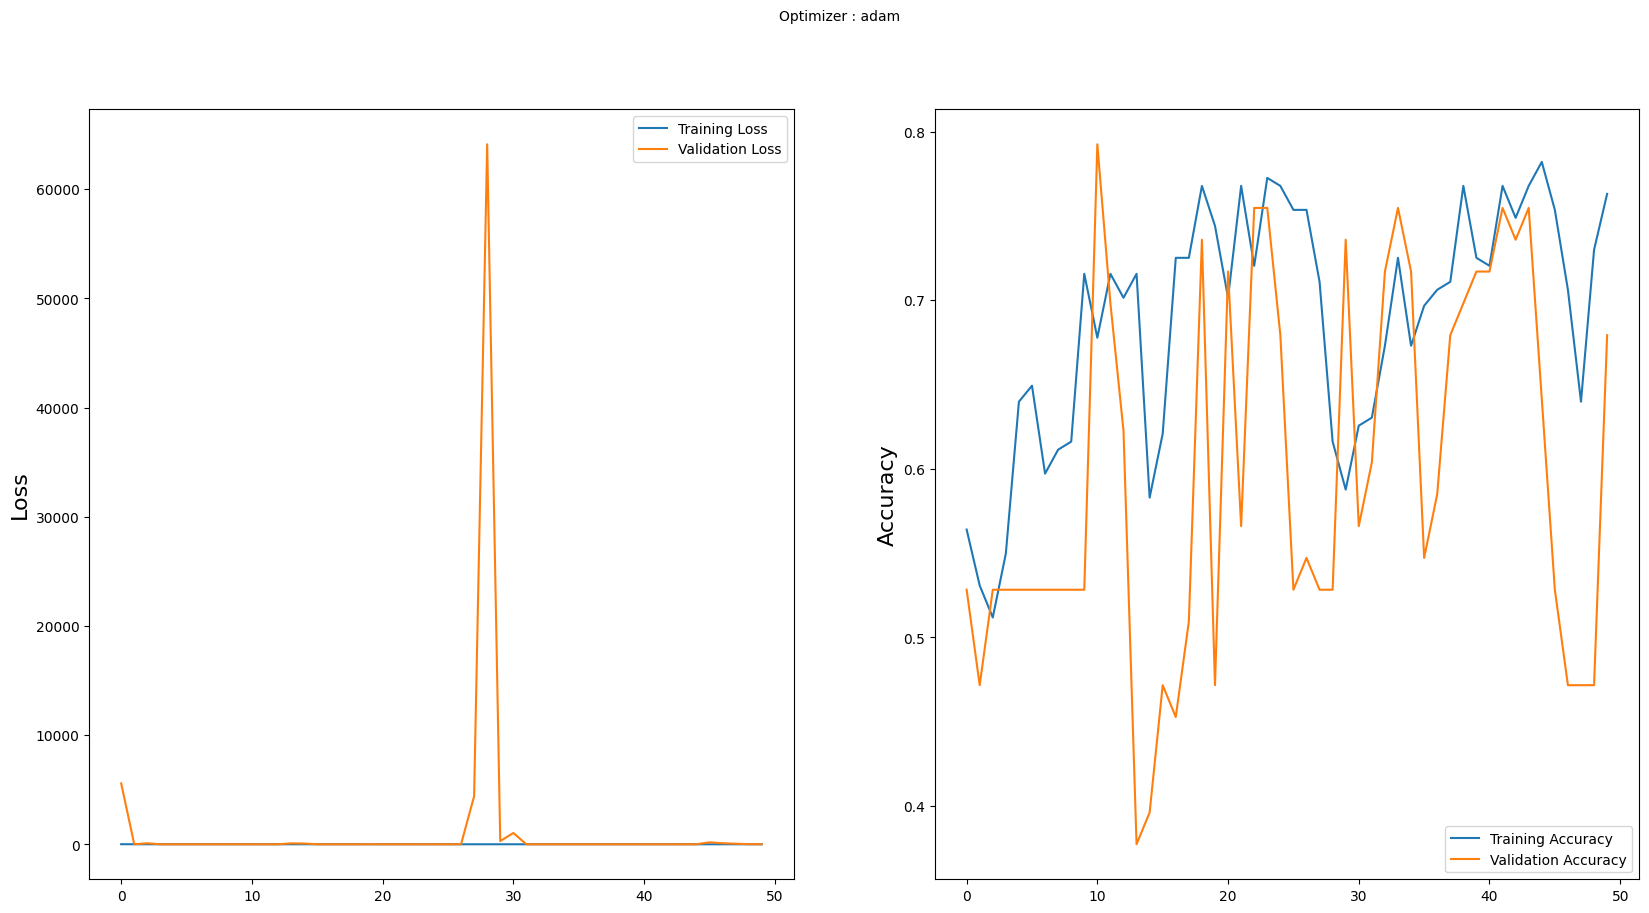

In [ ]:
import matplotlib.pyplot as plt

x=history1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]
res = VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(res.output)
prediction1 = Dense(2, activation='softmax')(x1)
model2 = Model(inputs = res.inputs, outputs = prediction1)
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
history2 = model2.fit(train_set,
                 epochs=50,
                 verbose=1,
                 validation_data=test_set)#,callbacks=[learning_rate_reduction, early_stop])


Epoch 1/50
106/106 [==============================] - 238s 2s/step - loss: 1.4211 - accuracy: 0.5166 - f1_m: 0.5189 - precision_m: 0.5189 - recall_m: 0.5189 - val_loss: 0.6918 - val_accuracy: 0.5283 - val_f1_m: 0.5185 - val_precision_m: 0.5185 - val_recall_m: 0.5185
Epoch 2/50
106/106 [==============================] - 231s 2s/step - loss: 0.7187 - accuracy: 0.5355 - f1_m: 0.5330 - precision_m: 0.5330 - recall_m: 0.5330 - val_loss: 0.7317 - val_accuracy: 0.5283 - val_f1_m: 0.5185 - val_precision_m: 0.5185 - val_recall_m: 0.5185
Epoch 3/50
106/106 [==============================] - 230s 2s/step - loss: 0.7092 - accuracy: 0.4882 - f1_m: 0.4858 - precision_m: 0.4858 - recall_m: 0.4858 - val_loss: 0.7235 - val_accuracy: 0.4717 - val_f1_m: 0.4630 - val_precision_m: 0.4630 - val_recall_m: 0.4630
Epoch 4/50
106/106 [==============================] - 235s 2s/step - loss: 0.7028 - accuracy: 0.5308 - f1_m: 0.5283 - precision_m: 0.5283 - recall_m: 0.5283 - val_loss: 0.6926 - val_accuracy: 0.5283 

In [ ]:
vgg_acc = history2.history["val_accuracy"][49]
vgg_prec = history2.history["val_precision_m"][49]
vgg_rec = history2.history["val_recall_m"][49]
vgg_f1 = history2.history["val_f1_m"][49]

storeResults('VGG19',vgg_acc,vgg_prec,vgg_rec,vgg_f1)

In [ ]:
model2.save("/content/drive/My Drive/vgg19.h5")

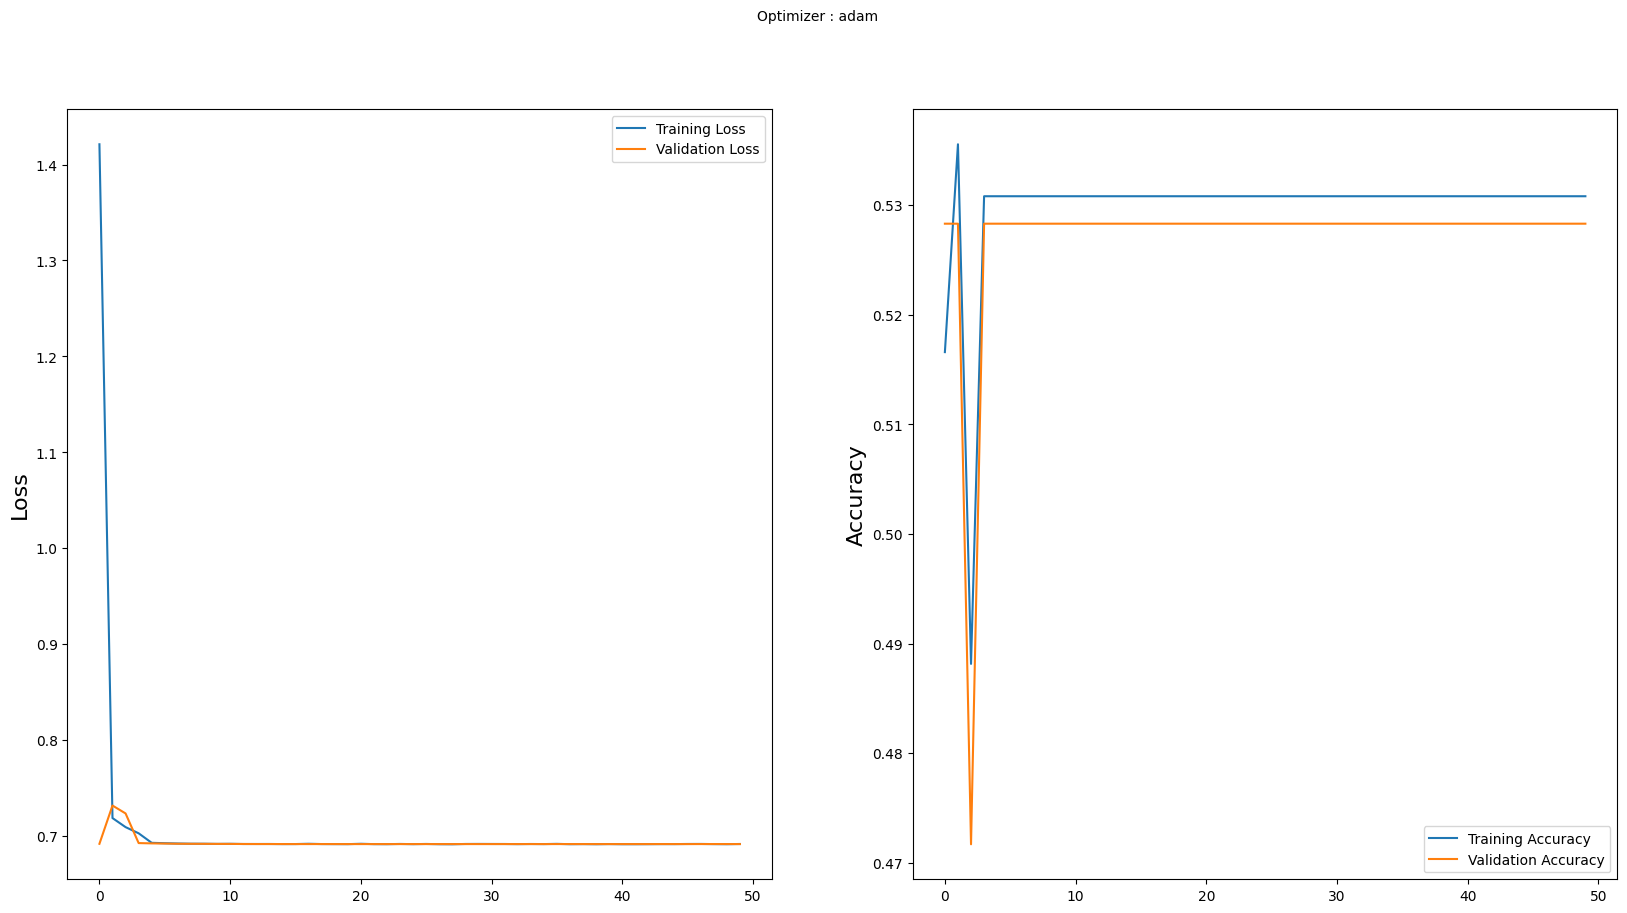

In [ ]:
import matplotlib.pyplot as plt

x=history2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

XCEPTION

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

In [ ]:
# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(2, activation='softmax')(x)
# Combining base and head
model3 = Model(inputs=base.input, outputs=head)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
model3.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=["accuracy",f1_m,precision_m, recall_m])

In [ ]:
hist3 = model3.fit(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/50
106/106 [==============================] - 96s 826ms/step - loss: 0.6861 - accuracy: 0.6161 - f1_m: 0.6179 - precision_m: 0.6179 - recall_m: 0.6179 - val_loss: 0.6859 - val_accuracy: 0.5472 - val_f1_m: 0.5370 - val_precision_m: 0.5370 - val_recall_m: 0.5370
Epoch 2/50
106/106 [==============================] - 80s 757ms/step - loss: 0.5984 - accuracy: 0.6967 - f1_m: 0.6934 - precision_m: 0.6934 - recall_m: 0.6934 - val_loss: 0.5495 - val_accuracy: 0.7925 - val_f1_m: 0.7963 - val_precision_m: 0.7963 - val_recall_m: 0.7963
Epoch 3/50
106/106 [==============================] - 85s 800ms/step - loss: 0.5700 - accuracy: 0.7251 - f1_m: 0.7217 - precision_m: 0.7217 - recall_m: 0.7217 - val_loss: 0.5729 - val_accuracy: 0.5472 - val_f1_m: 0.5370 - val_precision_m: 0.5370 - val_recall_m: 0.5370
Epoch 4/50
106/106 [==============================] - 79s 747ms/step - loss: 0.5501 - accuracy: 0.7014 - f1_m: 0.7028 - precision_m: 0.7028 - recall_m: 0.7028 - val_loss: 0.4952 - val_accuracy:

In [ ]:
xec_acc = hist3.history["val_accuracy"][49]
xec_prec = hist3.history["val_precision_m"][49]
xec_rec = hist3.history["val_recall_m"][49]
xec_f1 = hist3.history["val_f1_m"][49]

In [ ]:
storeResults('Xception',xec_acc,xec_prec,xec_rec,xec_f1)

In [ ]:
model3.save("/content/drive/My Drive/xcep.h5")

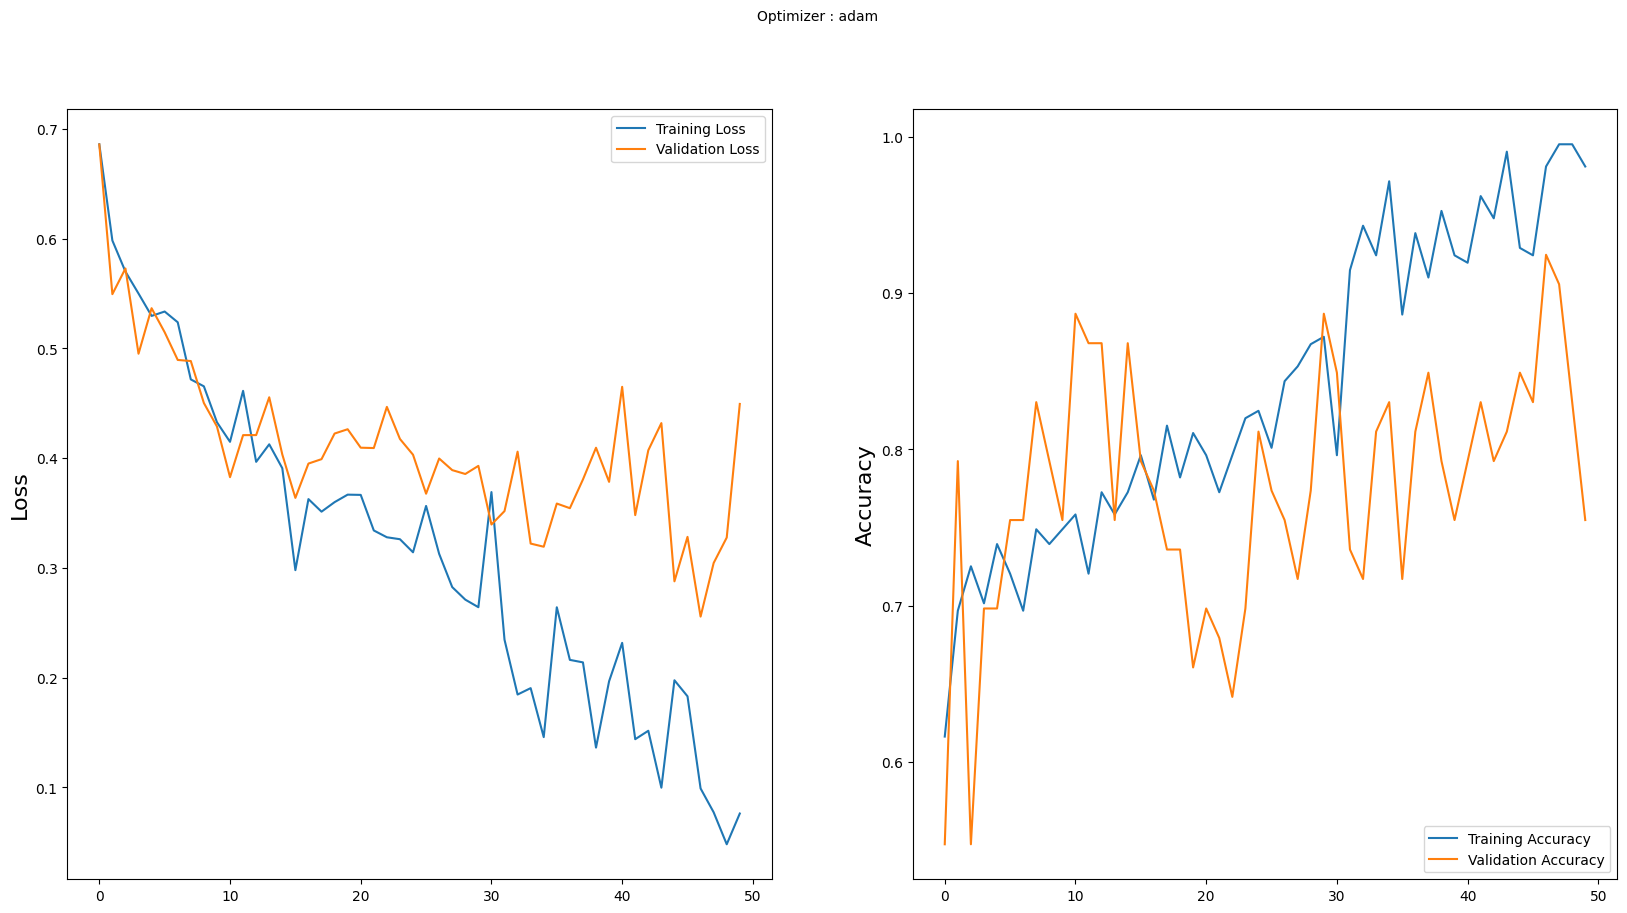

In [ ]:
import matplotlib.pyplot as plt

x=hist3
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,

                      })

In [ ]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,ResNet50,0.679,0.667,0.667,0.667
1,VGG19,0.528,0.519,0.519,0.519
2,Xception,0.755,0.759,0.759,0.759


# Graph

In [ ]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

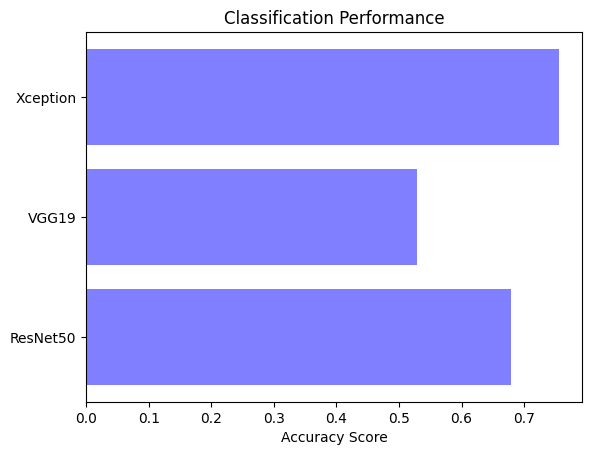

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

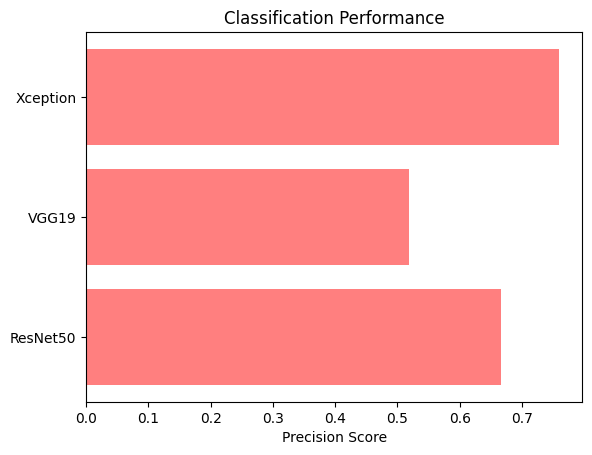

In [ ]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

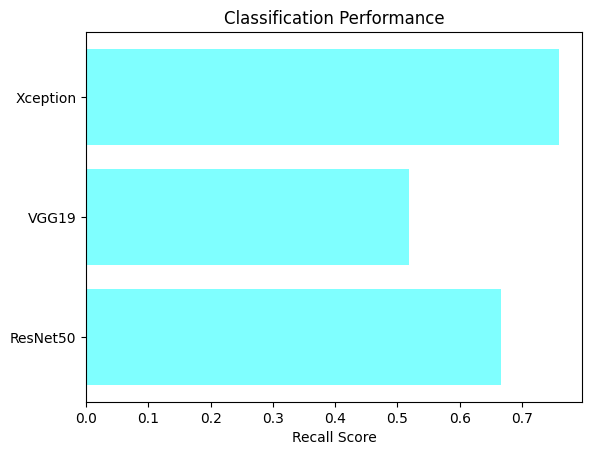

In [ ]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

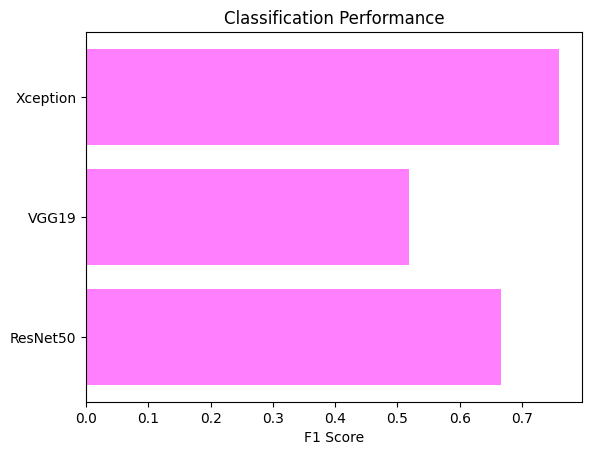

In [ ]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 2s 2s/step


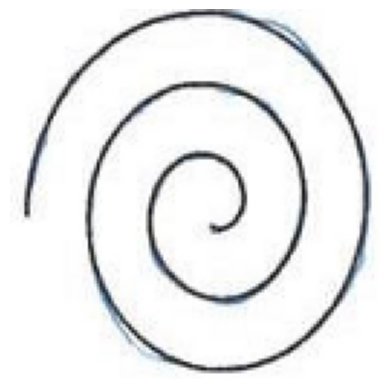

Xception Prediction: No Parkinson's disease
Xception Prediction Results: [[0.59515125 0.40484875]]
1/1 [==============================] - 0s 163ms/step


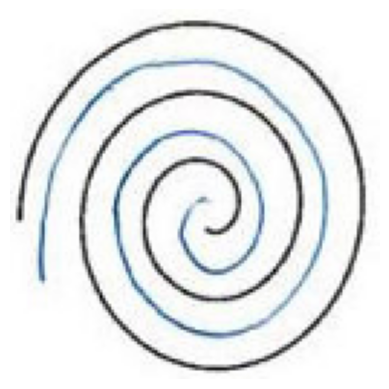

Xception Prediction: No Parkinson's disease
Xception Prediction Results: [[0.5536806  0.44631937]]
1/1 [==============================] - 0s 178ms/step


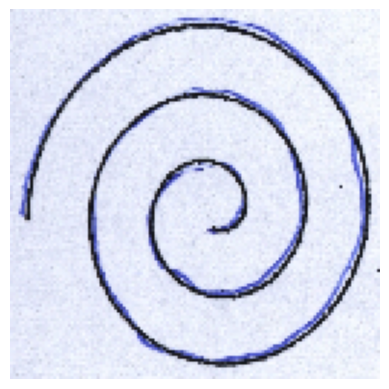

Xception Prediction: Parkinson's disease
Xception Prediction Results: [[0.00753136 0.99246866]]
1/1 [==============================] - 0s 99ms/step


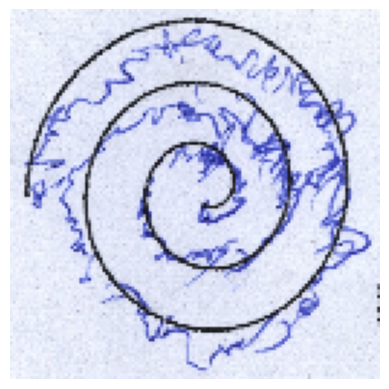

Xception Prediction: Parkinson's disease
Xception Prediction Results: [[0.25096494 0.749035  ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image
import tensorflow as tf

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


image_paths = ["/content/drive/My Drive/output/val/HealthySpiral/sp3-H30.jpg",
               "/content/drive/My Drive/output/val/HealthySpiral/sp2-H28.jpg",
               "/content/drive/My Drive/output/val/PatientSpiral/sp1-P2.jpg",
               "/content/drive/My Drive/output/val/PatientSpiral/sp2-P30.jpg"]


model_xception = tf.keras.models.load_model("/content/drive/My Drive/xcep.h5", custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})


for image_path in image_paths:
   
    img = keras_image.load_img(image_path, target_size=(128, 128))

    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  

    pred_xception = model_xception.predict(img_array)

    threshold = 0.5 
    prediction = "Parkinson's disease" if pred_xception[0][1] > threshold else "No Parkinson's disease"

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Display prediction
    print("Xception Prediction:", prediction)

    # Display prediction results
    print("Xception Prediction Results:", pred_xception)
